In [2]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_20newsgroups, make_classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

### Naive Bayes Algorithm

`Naive Bayes Theorem is a probabilistic machine learning algorithm based on Bayes’ Theorem, with a strong assumption of feature independence.`

`Bayes theorem helps us calculate the probability of a class given some evidence.`

### Bernouli Naive Bayes from Scratch

In [1]:
def bernouliNB(df,target):
    '''
    Input: dataframe and target name
    Output: naive bayes of asked conditions
    '''
    # Data seperated according to target
    target_1 = (df[df[target] == df[target].unique()[0]])
    target_2 = (df[df[target] == df[target].unique()[1]])

    # Create all the data for calculating the probility
    probabilities = {}
    probabilities1 = {}
    for i in df.columns:
        if i != target:
            # Split data on the basis of target
            temp = target_1.groupby([target, i]).size().reset_index()
            temp1 = target_2.groupby([target, i]).size().reset_index()
    
            # Create feature
            a, aa = temp.columns[0], temp1.columns[0]
            b, bb = temp.columns[1], temp1.columns[1]
            temp['F'] = b + '_' + temp[i]
            temp1['F'] = bb + '_' + temp1[i]
    
            # Drop efeatures after merging
            temp.drop([a,b], axis = 1, inplace= True)
            temp1.drop([aa,bb], axis = 1, inplace= True)
    
            for i in range(len(temp)):
                probabilities[temp.iloc[i]['F']] = temp.iloc[i][0]
            for i in range(len(temp1)):
                probabilities1[temp1.iloc[i]['F']] = temp1.iloc[i][0]

    #  Input from user
    n = int(input('Please tell your number of conditions: \n'))

    # All conditions for options
    pro = sorted(list(set(list(probabilities.keys()) + list(probabilities1.keys()))))
    # To give on line by line
    for i in pro:
        print(i)
    print()
    
    conditions = []
    for i in range(n):
        conditions.append(input(f'Enter {i+1} conditions from above options:\n'))
        print()

    # Calculation of naive bayes using laplace
    result = 1
    result1 = 1
    for i in range(n):
        if conditions[i] in probabilities.keys():
            result *= ((probabilities[conditions[i]] + 1) / (df[target].value_counts()[df[target].unique()[0]] + 2))
        else:
            result *= ((0 + 1) / (df[target].value_counts()[df[target].unique()[0]] + 2))
            
        if conditions[i] in probabilities1.keys():
            result1 *= ((probabilities1[conditions[i]] + 1) / (df[target].value_counts()[df[target].unique()[1]] + 2))
        else:
            result1 *= ((0 + 1) / (df[target].value_counts()[df[target].unique()[1]] + 2))

    return f"Probability for {df[target].unique()[0]} is {result} and {df[target].unique()[1]} is {result1}"

In [32]:
bernouliNB(movie_review_data, 'target')

Please tell your number of conditions: 
 2


big_star_no
big_star_yes
high_budget_no
high_budget_yes
movie_m1
movie_m2
movie_m3
movie_m4
movie_m5
popular_director_no
popular_director_yes



Enter 1 conditions from above options:
 movie_m1


Enter 2 conditions from above options:
 popular_director_yes


'Probability for hit is 0.25 and flop is 0.12'

In [28]:
bernouliNB(movie_data, 'will_watch')

Please tell your number of conditions: 
 1


has_netflix_0
has_netflix_1
like_action_0
like_action_1
like_romance_0
like_romance_1



Enter 1 conditions from above options:
 has_netflix_0


'Probability for yes is 0.2 and no is 0.75'

### GaussianNB from Scratch

In [67]:
# Dataset: [Study Hours, Sleep Hours], Label
data = [
    ([4, 5], "Fail"),
    ([5, 6], "Fail"),
    ([10, 8], "Pass"),
    ([9, 7], "Pass")
]

# New student to predict
X_new = [6, 6]



import math
from collections import defaultdict

# 1. Organize data by class
def separate_by_class(data):
    separated = defaultdict(list)
    for features, label in data:
        separated[label].append(features)
    return separated

# 2. Calculate mean and variance
def mean(numbers):
    return sum(numbers) / len(numbers)

def variance(numbers, mean_val):
    return sum((x - mean_val) ** 2 for x in numbers) / len(numbers)

def summarize_class_data(data):
    summaries = {}
    for cls, rows in data.items():
        # Transpose rows to get each feature separately
        features = list(zip(*rows))
        summaries[cls] = [(mean(f), variance(f, mean(f))) for f in features]
    return summaries

# 3. Gaussian Probability Density Function
def gaussian_pdf(x, mean, var):
    if var == 0:
        return 1.0 if x == mean else 0.0  # Handle zero variance
    exponent = math.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / math.sqrt(2 * math.pi * var)) * exponent

# 4. Class probabilities
def calculate_class_probabilities(summaries, input_data, class_priors):
    probabilities = {}
    for cls, feature_stats in summaries.items():
        probabilities[cls] = class_priors[cls]
        for i in range(len(input_data)):
            mean, var = feature_stats[i]
            prob = gaussian_pdf(input_data[i], mean, var)
            probabilities[cls] *= prob
    return probabilities

# 5. Predict
def predict(data, X_new):
    separated = separate_by_class(data)
    summaries = summarize_class_data(separated)

    total_count = len(data)
    class_priors = {cls: len(rows) / total_count for cls, rows in separated.items()}

    probs = calculate_class_probabilities(summaries, X_new, class_priors)
    predicted_class = max(probs, key=probs.get)
    return predicted_class, probs

# Run prediction
X_new = [6, 6]
prediction, probs = predict(data, X_new)

print(f"Predicted class: {prediction}")
print(f"Class probabilities: {probs}")

{'Fail': [(4.5, 0.25), (5.5, 0.25)], 'Pass': [(9.5, 0.25), (7.5, 0.25)]}
Predicted class: Fail
Class probabilities: {'Fail': 0.002144755142391309, 'Pass': 8.096739227061666e-14}


### MultinomialNB from Scratch

In [68]:
# Data
X_train = np.array([
    [3, 0, 2, 0],  # Review 1 - Positive
    [2, 1, 1, 0],  # Review 2 - Positive
    [0, 3, 0, 2],  # Review 3 - Negative
    [1, 2, 0, 3]   # Review 4 - Negative
])

y_train = np.array([
    "Positive",
    "Positive",
    "Negative",
    "Negative"
])

# Vocabulary index
vocab = ["love", "hate", "excellent", "boring"]
n_classes = len(np.unique(y_train))
classes = np.unique(y_train)

# Laplace smoothing parameter
alpha = 1

# Step 1: Prior probabilities P(y)
priors = {}
for label in classes:
    priors[label] = np.sum(y_train == label) / len(y_train)

# Step 2: Likelihood probabilities theta_yi
likelihoods = {}

for label in classes:
    # Filter samples of this class
    X_class = X_train[y_train == label]
   
    # Sum word counts for this class
    word_counts = np.sum(X_class, axis=0)
   
    # Total words (with Laplace smoothing denominator)
    total_words = np.sum(word_counts)
   
    # Calculate likelihoods with Laplace smoothing
    likelihoods[label] = (word_counts + alpha) / (total_words + alpha * len(vocab))

# Step 3: Predict function
def predict(X_test):
    scores = {}
   
    for label in classes:
        # Start with log(P(y))
        score = np.log(priors[label])
       
        for i in range(len(vocab)):
            # Add log(θ_yi) * count of word i
            score += X_test[i] * np.log(likelihoods[label][i])
       
        scores[label] = score
   
    # Return label with highest score
    return max(scores, key=scores.get), scores

# New review
X_test = np.array([2, 1, 1, 0])

# Predict
prediction, raw_scores = predict(X_test)

print("Prediction:", prediction)
print("Raw scores (log-space):", raw_scores)

# Optional: If you want raw probabilities instead of logs
def softmax(log_scores):
    values = np.array(list(log_scores.values()))
    max_log = np.max(values)  # for numerical stability
    exp_scores = np.exp(values - max_log)
    probs = exp_scores / np.sum(exp_scores)
    return dict(zip(log_scores.keys(), probs))

print("Probabilities:", softmax(raw_scores))

Prediction: Positive
Raw scores (log-space): {np.str_('Negative'): np.float64(-8.34729415462084), np.str_('Positive'): np.float64(-5.289984130270146)}
Probabilities: {np.str_('Negative'): np.float64(0.044902925977225436), np.str_('Positive'): np.float64(0.9550970740227746)}


### visualize how Bayes' Theorem updates our beliefs using a probability chart.

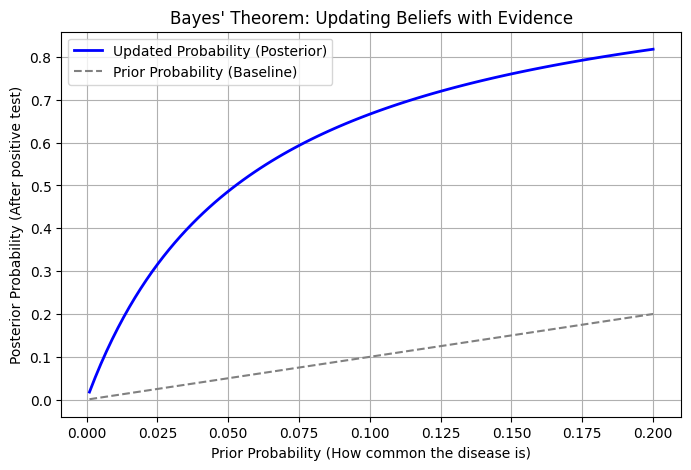

In [7]:
# Function to compute posterior probability using Bayes' Theorem
def bayes_theorem(prior_A, likelihood_B_given_A, false_positive_B_given_not_A):
    prob_B = (likelihood_B_given_A * prior_A) + (false_positive_B_given_not_A * (1 - prior_A))
    posterior_A_given_B = (likelihood_B_given_A * prior_A) / prob_B
    return posterior_A_given_B

# Define a range of prior probabilities (how common the disease is in the population)
prior_probs = np.linspace(0.001, 0.2, 100)  # From 0.1% to 20% prevalence

# Fixed likelihoods (from medical test example)
likelihood_test_given_disease = 0.9  # Sensitivity (True Positive Rate)
false_positive_test = 0.05  # False Positive Rate

# Compute posterior probabilities for different priors
posterior_probs = [bayes_theorem(p, likelihood_test_given_disease, false_positive_test) for p in prior_probs]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(prior_probs, posterior_probs, label="Updated Probability (Posterior)", color="blue", lw=2)
plt.plot(prior_probs, prior_probs, linestyle="dashed", color="gray", label="Prior Probability (Baseline)")

# Labels and title
plt.xlabel("Prior Probability (How common the disease is)")
plt.ylabel("Posterior Probability (After positive test)")
plt.title("Bayes' Theorem: Updating Beliefs with Evidence")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

`The blue curve shows how the probability of actually having the disease (posterior probability) changes based on the initial assumption of how common the disease is (prior probability).` <br>
`The dashed gray line represents a baseline where prior and posterior are equal (i.e., no update from evidence).`

#### 🔹 Key Insights:

`If the disease is very rare (left side), even a positive test doesn't make us very confident that a person has it.` <br>
`If the disease is common (right side), the test strengthens our belief much more.` <br>
`This shows why false positives matter more for rare conditions!`